In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
username = "root"
password = "root"
host = "localhost"
port = "3306"
database = "mobile_db"

In [3]:
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")
df = pd.read_sql("SELECT * FROM mobile_data", engine)

In [4]:
print(df.shape)
df.head()

(1200, 7)


,Unnamed: 0,Brand,Name,Ratings,Reviews,Source,Price
0,0,Samsung,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",4.0,6358,amazon,6499
1,1,POCO,"POCO C71, Cool Blue (6GB, 128GB)",3.9,71,amazon,6999
2,2,Nokia,Nokia 105 Classic | Single SIM Keypad Phone wi...,3.8,19235,amazon,999
3,3,OnePlus,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.2,9101,amazon,16999
4,4,Motorola,"Motorola G05 4G (Forest Green, 4GB RAM, 64GB S...",3.8,218,amazon,7586


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Brand,Name,Ratings,Reviews,Source,Price
0,Samsung,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",4.0,6358,amazon,6499
1,POCO,"POCO C71, Cool Blue (6GB, 128GB)",3.9,71,amazon,6999
2,Nokia,Nokia 105 Classic | Single SIM Keypad Phone wi...,3.8,19235,amazon,999
3,OnePlus,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.2,9101,amazon,16999
4,Motorola,"Motorola G05 4G (Forest Green, 4GB RAM, 64GB S...",3.8,218,amazon,7586


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [8]:
features = ["Price", "Ratings", "Reviews", "Brand"]

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Price", "Ratings", "Reviews"]),
        ("cat", OneHotEncoder(drop="first"), ["Brand"])
    ]
)

In [10]:
X = preprocessor.fit_transform(df[features])

In [11]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

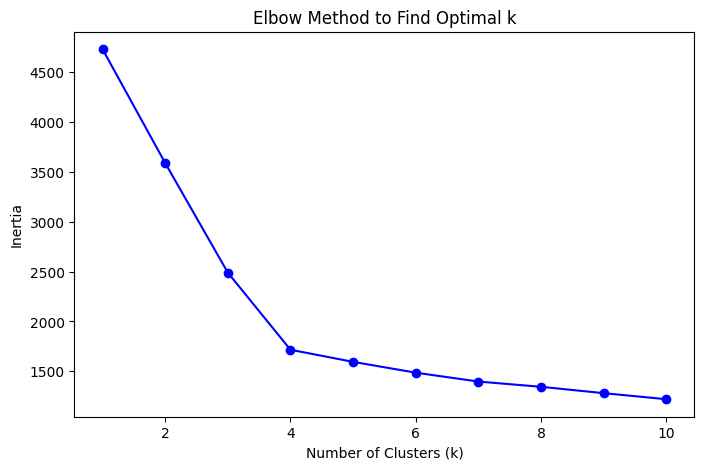

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal k")
plt.show()


In [13]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

In [14]:
df.head()

,Brand,Name,Ratings,Reviews,Source,Price,Cluster
0,Samsung,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",4.0,6358,amazon,6499,3
1,POCO,"POCO C71, Cool Blue (6GB, 128GB)",3.9,71,amazon,6999,3
2,Nokia,Nokia 105 Classic | Single SIM Keypad Phone wi...,3.8,19235,amazon,999,3
3,OnePlus,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.2,9101,amazon,16999,3
4,Motorola,"Motorola G05 4G (Forest Green, 4GB RAM, 64GB S...",3.8,218,amazon,7586,3


In [16]:
import seaborn as sns

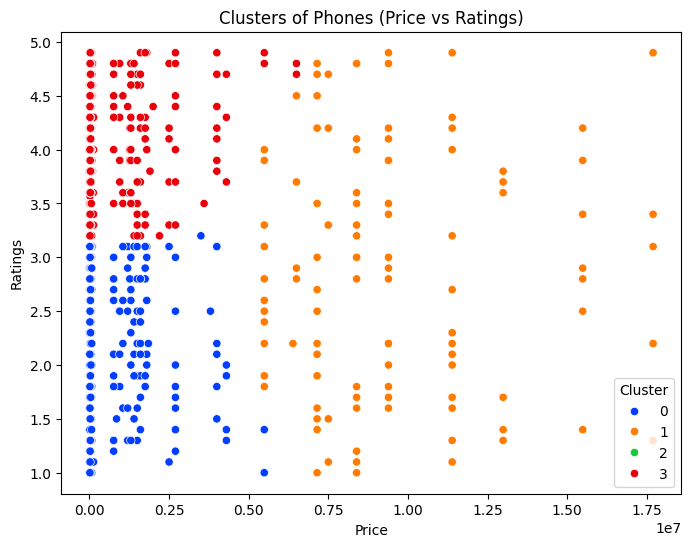

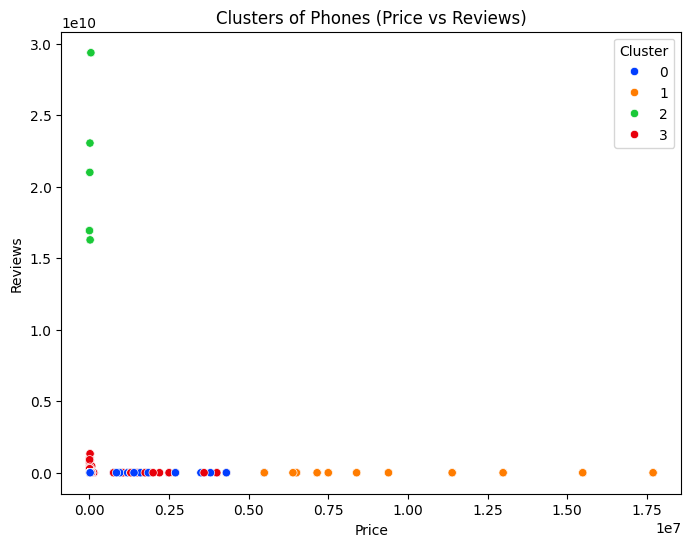

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Price", y="Ratings", hue="Cluster", palette="bright")
plt.title("Clusters of Phones (Price vs Ratings)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Price", y="Reviews", hue="Cluster", palette="bright")
plt.title("Clusters of Phones (Price vs Reviews)")
plt.show()